In [28]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train = pd.read_csv('C:/data/dankook/train.csv', index_col=0)
test = pd.read_csv('C:/data/dankook/test.csv', index_col=0)
sample_submission = pd.read_csv('C:/data/dankook/sample_submission.csv', index_col=0)

In [30]:
train[:10]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0
5,16.700402,15.506766,14.978825,14.675482,14.515478,0.014955,16.51564,15.37761,14.88758,14.60550,14.45388,1,1,1.172191,1.178541,1.166002,1.169076,1.175344,2
6,23.906276,20.847207,19.978427,19.495200,19.052571,-0.000042,23.84584,20.70001,19.87659,19.42051,19.00401,2,2,1.201924,1.202019,1.201963,1.201927,1.201954,0
7,19.142311,17.560843,16.801548,16.363787,16.079607,0.103124,18.83542,17.35197,16.65647,16.25461,15.99042,2,2,1.173380,1.177078,1.169829,1.171587,1.175211,2
8,18.581256,17.286786,16.677022,16.272811,16.037178,0.083884,18.29758,17.06158,16.52144,16.15749,15.95350,4,4,1.318398,1.328035,1.309011,1.313671,1.323179,2


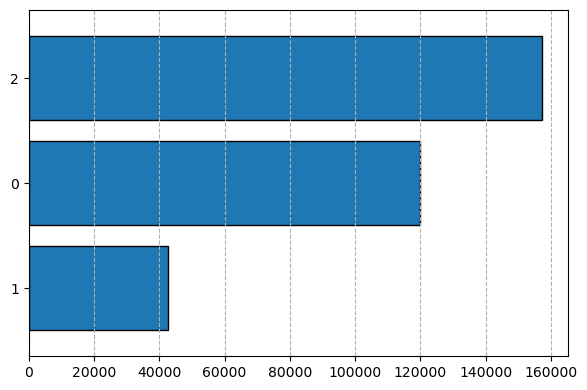

In [26]:
fig, ax = plt.subplots(dpi=100)
train['class'].value_counts(ascending=True).plot(kind='barh', width=0.8, edgecolor='black', ax=ax)
ax.grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

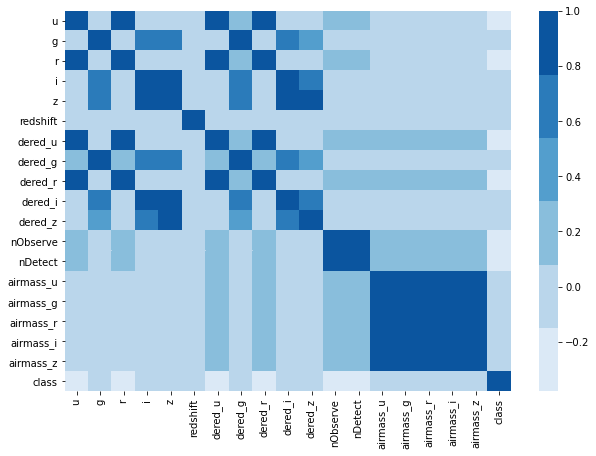

In [29]:
# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [4]:
train_x = train.drop(columns='class', axis=1)
train_y = train['class']
test_x = test

In [5]:
train_x

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,2,2,1.093010,1.088828,1.097310,1.095145,1.090905
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,2,2,1.051689,1.050838,1.052640,1.052152,1.051252
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,31,30,1.193259,1.194140,1.192509,1.192868,1.193683


In [6]:
forest = DecisionTreeClassifier(max_depth=1)
forest.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=1)

In [21]:
y_pred = np.argmax(forest.predict_proba(test_x), axis=1)

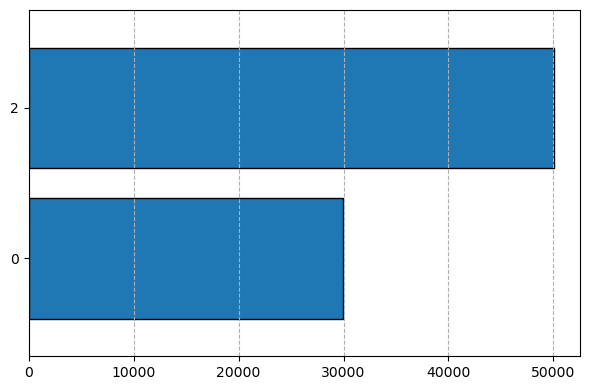

In [25]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
fig, ax = plt.subplots(dpi=100)
submission['class'].value_counts(ascending=True).plot(kind='barh', width=0.8, edgecolor='black', ax=ax)
ax.grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()
submission.to_csv('C:/data/dankook/submission.csv', index=True)